In [3]:
import anndata as ad
import numpy as np
import scanpy as sc 

from core.preprocessor import Preprocessor
from core.normalizer import Normalizer
from core.differentiator import Differentiator
from core.model_tester import ModelTester
from plotmodules.norm_plots import *

CT_COUNTS_META_PATH = 'ct_counts_public_meta.h5ad'

ct_counts_metadata = ad.read_h5ad(CT_COUNTS_META_PATH)


In [4]:
# Categorize
pp = Preprocessor()
pp.categorize(ct_counts_metadata, 'cogdx', pp.COGDX_MAP, add_catcodes=True)
ct_counts_metadata = ct_counts_metadata[ct_counts_metadata.obs['cogdx'].isin([1, 4, 5])]
ct_counts_metadata.X.shape

(306, 54)

In [5]:
# Differential abundance
from scipy.stats import ranksums
from statsmodels.stats.multitest import fdrcorrection

diff = Differentiator('l1', ranksums, fdrcorrection, 'cogdx_cat', ('AD', 'H'))
diff.differentiate(ct_counts_metadata)

/home/jacob/Documents/BEP/bsc-thesis-scripts/core/differentiator.py:55: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.


log2( fold change ) = log2( AD/H )


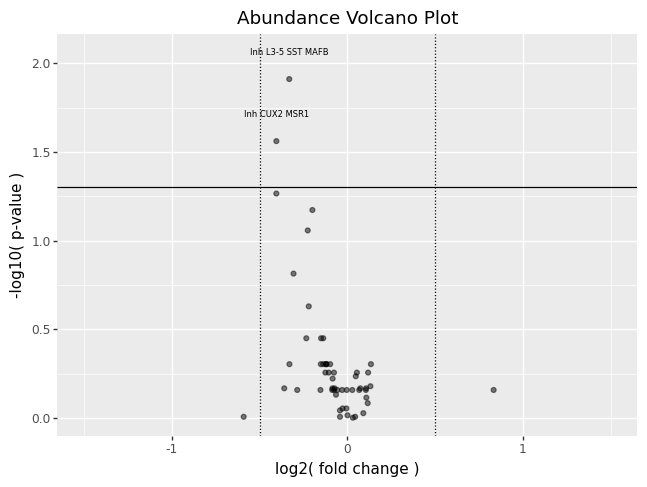

In [6]:
diff.volcano_plot(ct_counts_metadata)

In [7]:
diff.abundance_df.sort_values('corr_pvalue')

,significant,corr_pvalue,log2fc,log10p
Inh L3-5 SST MAFB,True,0.012271,-0.330749,1.911120
Inh CUX2 MSR1,True,0.027474,-0.404106,1.561083
Inh LAMP5 RELN,False,0.054284,-0.404213,1.265324
Inh VIP TSHZ2,False,0.067233,-0.198911,1.172415
Inh ENOX2 SPHKAP,False,0.087638,-0.225480,1.057305
Inh PTPRK FAM19A1,False,0.153580,-0.306303,0.813665
Inh L1 PAX6 CA4,False,0.234941,-0.219643,0.629042
Inh SORCS1 TTN,False,0.355596,-0.233711,0.449043
Inh PVALB HTR4,False,0.355596,-0.137042,0.449043
Inh L5-6 SST TH,False,0.355596,-0.149671,0.449043


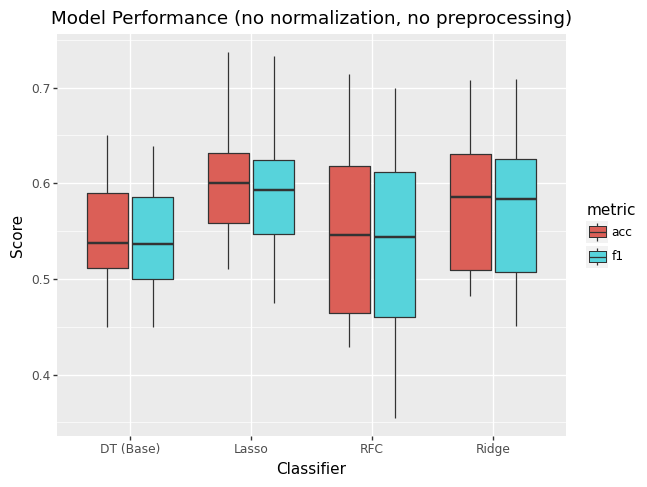

In [8]:
# Test models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, RidgeClassifier

tester = ModelTester(None, DecisionTreeClassifier(), 'cogdx_catcode', [0, 1], 10, random_state=42, verbose=False)
tester.test_baseline(ct_counts_metadata, 'DT (Base)')
tester.test_models(ct_counts_metadata, [RandomForestClassifier(), RidgeClassifier(), Lasso()], ['RFC', 'Ridge', 'Lasso'])
tester.plot_results('Model Performance (no normalization, no preprocessing)')